In [1]:
# 方法1：导入具体的模块
from openap import prop
from openap import FuelFlow, Emission, WRAP

# 创建飞机对象
aircraft = prop.aircraft('A320')
print(aircraft)

# 或者查看飞机数据
print(prop.aircraft_engine_options('A320'))

{'aircraft': 'Airbus A320', 'mtow': 78000, 'mlw': 66000, 'oew': 42600, 'mfc': 24210, 'vmo': 350, 'mmo': 0.82, 'ceiling': 12500, 'pax': {'max': 180, 'low': 140, 'high': 170}, 'fuselage': {'length': 37.57, 'height': 4.14, 'width': 3.95}, 'wing': {'area': 124, 'span': 35.8, 'mac': 4.1935, 'sweep': 25, 't/c': None}, 'flaps': {'type': 'single-slotted', 'area': 21.1, 'bf/b': 0.78, 'lambda_f': 0.9, 'cf/c': 0.176, 'Sf/S': 0.17}, 'cruise': {'height': 11000, 'mach': 0.78, 'range': 5000}, 'engine': {'type': 'turbofan', 'mount': 'wing', 'number': 2, 'default': 'CFM56-5B4', 'options': {'A320-111': 'CFM56-5-A1', 'A320-211': 'CFM56-5-A1', 'A320-212': 'CFM56-5A3', 'A320-214': 'CFM56-5B4', 'A320-215': 'CFM56-5B5', 'A320-216': 'CFM56-5B6', 'A320-231': 'V2500-A1', 'A320-232': 'V2527-A5', 'A320-233': 'V2527E-A5'}}, 'drag': {'cd0': 0.018, 'k': 0.039, 'e': 0.799, 'gears': 0.017}, 'fuel': {'engine': 'CFM56-5B4/P', 'fuel_coef': 2.65942225}, 'limits': {'MTOW': 78000, 'MLW': 66000, 'OEW': 42600, 'MFC': 24210, '

In [15]:
# 方法2：如果有Aircraft类，可能在不同的子模块中
import openap
# 查看openap包中有哪些可用的模块
print(dir(openap))

['Drag', 'Emission', 'FlightGenerator', 'FlightPhase', 'FuelFlow', 'Thrust', 'WRAP', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'aero', 'base', 'drag', 'emission', 'extra', 'filters', 'fuel', 'gen', 'kinematic', 'nav', 'phase', 'prop', 'statistics', 'thrust']


In [16]:
from openap.prop import aircraft
ac_data = aircraft('A320')
print(ac_data)

{'aircraft': 'Airbus A320', 'mtow': 78000, 'mlw': 66000, 'oew': 42600, 'mfc': 24210, 'vmo': 350, 'mmo': 0.82, 'ceiling': 12500, 'pax': {'max': 180, 'low': 140, 'high': 170}, 'fuselage': {'length': 37.57, 'height': 4.14, 'width': 3.95}, 'wing': {'area': 124, 'span': 35.8, 'mac': 4.1935, 'sweep': 25, 't/c': None}, 'flaps': {'type': 'single-slotted', 'area': 21.1, 'bf/b': 0.78, 'lambda_f': 0.9, 'cf/c': 0.176, 'Sf/S': 0.17}, 'cruise': {'height': 11000, 'mach': 0.78, 'range': 5000}, 'engine': {'type': 'turbofan', 'mount': 'wing', 'number': 2, 'default': 'CFM56-5B4', 'options': {'A320-111': 'CFM56-5-A1', 'A320-211': 'CFM56-5-A1', 'A320-212': 'CFM56-5A3', 'A320-214': 'CFM56-5B4', 'A320-215': 'CFM56-5B5', 'A320-216': 'CFM56-5B6', 'A320-231': 'V2500-A1', 'A320-232': 'V2527-A5', 'A320-233': 'V2527E-A5'}}, 'drag': {'cd0': 0.018, 'k': 0.039, 'e': 0.799, 'gears': 0.017}, 'fuel': {'engine': 'CFM56-5B4/P', 'fuel_coef': 2.65942225}, 'limits': {'MTOW': 78000, 'MLW': 66000, 'OEW': 42600, 'MFC': 24210, '

In [17]:
# 获取所有支持的飞机型号
aircraft_list = prop.available_aircraft()
print("OpenAP支持的飞机型号:")
print(f"总共 {len(aircraft_list)} 个机型:")
for aircraft in sorted(aircraft_list):
    print(aircraft)

OpenAP支持的飞机型号:
总共 36 个机型:
a19n
a20n
a21n
a318
a319
a320
a321
a332
a333
a343
a359
a388
b37m
b38m
b39m
b3xm
b734
b737
b738
b739
b744
b748
b752
b763
b772
b773
b77w
b788
b789
c550
e145
e170
e190
e195
e75l
glf6


In [18]:
# 5. 燃油消耗分析
print("\n=== A320 燃油消耗分析 ===")
ff = FuelFlow(ac='A320')

# 不同飞行阶段的燃油消耗
altitudes = [0, 10000, 20000, 30000, 35000]  # 英尺
speeds = [250, 300, 350, 400, 450]  # 节

print("不同高度和速度下的燃油消耗率 (kg/s):")
print("高度(ft)\t速度(kts)\t燃油消耗率")
for alt in altitudes:
    for spd in speeds:
        try:
            fuel_flow = ff.enroute(mass=70000, tas=spd, alt=alt)  # 假设质量70吨
            print(f"{alt}\t\t{spd}\t\t{fuel_flow:.4f}")
        except:
            print(f"{alt}\t\t{spd}\t\tN/A")
        break  # 只显示每个高度的一个速度示例


=== A320 燃油消耗分析 ===
不同高度和速度下的燃油消耗率 (kg/s):
高度(ft)	速度(kts)	燃油消耗率
0		250		0.7261
10000		250		0.7099
20000		250		0.7759
30000		250		0.9503
35000		250		1.0885


In [23]:
# 方法4：通过飞机基本数据推导阻力信息
print("\n=== 从基本数据获取相关信息 ===")
aircraft = prop.aircraft('A320')

print("A320相关性能参数:")
# 查看所有可用的键
for key in aircraft.keys():
    if any(keyword in key.lower() for keyword in ['drag', 'cd', 'cl', 'lift', 'aero']):
        print(f"  {key}: {aircraft[key]}")

# 显示所有参数以便查找阻力相关数据
print("\n所有A320参数:")
for key, value in aircraft.items():
    print(f"  {key}: {value}")


=== 从基本数据获取相关信息 ===
A320相关性能参数:
  drag: {'cd0': 0.018, 'k': 0.039, 'e': 0.799, 'gears': 0.017}

所有A320参数:
  aircraft: Airbus A320
  mtow: 78000
  mlw: 66000
  oew: 42600
  mfc: 24210
  vmo: 350
  mmo: 0.82
  ceiling: 12500
  pax: {'max': 180, 'low': 140, 'high': 170}
  fuselage: {'length': 37.57, 'height': 4.14, 'width': 3.95}
  wing: {'area': 124, 'span': 35.8, 'mac': 4.1935, 'sweep': 25, 't/c': None}
  flaps: {'type': 'single-slotted', 'area': 21.1, 'bf/b': 0.78, 'lambda_f': 0.9, 'cf/c': 0.176, 'Sf/S': 0.17}
  cruise: {'height': 11000, 'mach': 0.78, 'range': 5000}
  engine: {'type': 'turbofan', 'mount': 'wing', 'number': 2, 'default': 'CFM56-5B4', 'options': {'A320-111': 'CFM56-5-A1', 'A320-211': 'CFM56-5-A1', 'A320-212': 'CFM56-5A3', 'A320-214': 'CFM56-5B4', 'A320-215': 'CFM56-5B5', 'A320-216': 'CFM56-5B6', 'A320-231': 'V2500-A1', 'A320-232': 'V2527-A5', 'A320-233': 'V2527E-A5'}}
  drag: {'cd0': 0.018, 'k': 0.039, 'e': 0.799, 'gears': 0.017}
  fuel: {'engine': 'CFM56-5B4/P', 'fuel_

A320基本参数:

计算不同高度下的性能参数...


/tmp/ipykernel_308003/843512765.py:125: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308003/843512765.py:125: UserWarning: Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308003/843512765.py:125: UserWarning: Glyph 36895 (\N{CJK UNIFIED IDEOGRAPH-901F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308003/843512765.py:125: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308003/843512765.py:125: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308003/843512765.py:125: UserWarning: Glyph 31859 (\N{CJK UNIFIED IDEOGRAPH-7C73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308003/843512765.py:125: UserWarning: Glyph 39532 (\N{CJK UNIFIED I


=== A320 高度-速度数据表 ===
高度(m)	高度(ft)	密度(kg/m³)	CAS250→TAS	Mach@CAS250
-----------------------------------------------------------------
0	0		1.2250		250.0		0.378
612	2009		1.1546		257.5		0.392
1224	4017		1.0873		265.4		0.407
1837	6026		1.0231		273.6		0.422
2449	8035		0.9618		282.1		0.439
3061	10043		0.9034		291.1		0.456
3673	12052		0.8477		300.5		0.474
4286	14061		0.7947		310.4		0.494
4898	16069		0.7443		320.7		0.514
5510	18078		0.6963		331.6		0.536


/home/longqin/anaconda3/envs/upcenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/longqin/anaconda3/envs/upcenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/longqin/anaconda3/envs/upcenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31859 (\N{CJK UNIFIED IDEOGRAPH-7C73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/longqin/anaconda3/envs/upcenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/longqin/anaconda3/envs/upcenv/lib/python3.10/site-packages/IPython/cor

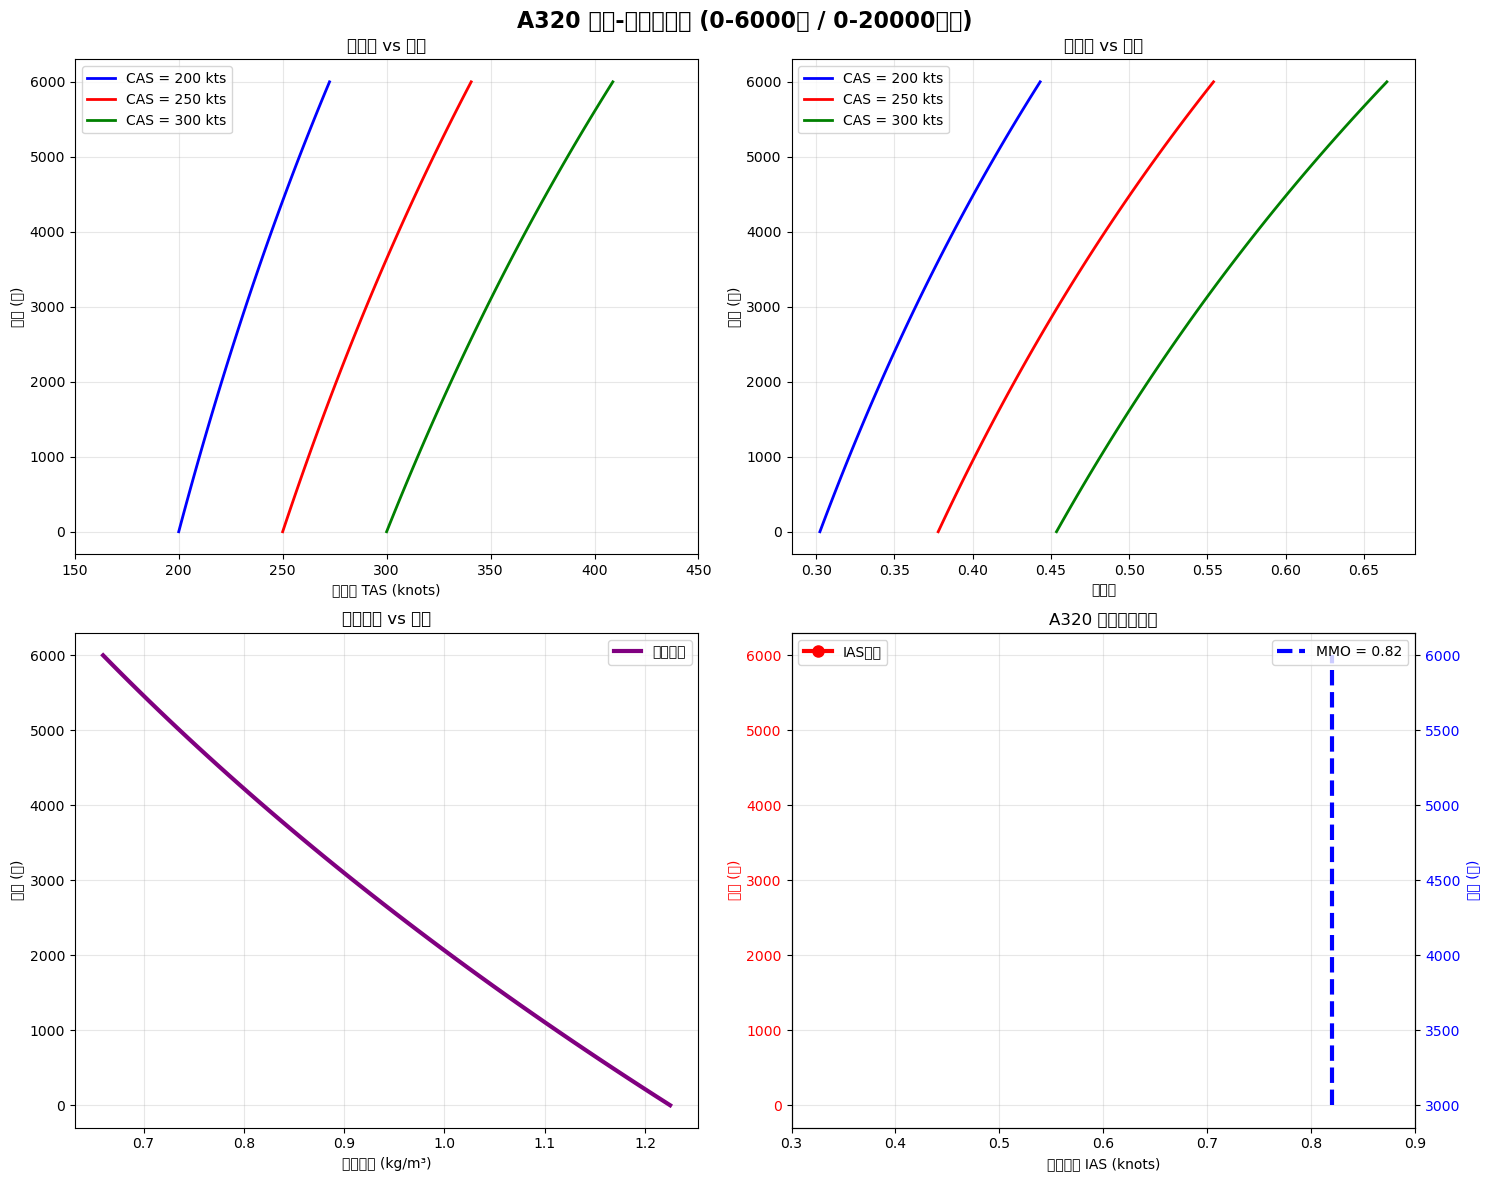


数据框架形状: (10, 5)
    altitude_m  altitude_ft   density  temperature  cas_250_to_tas
0     0.000000     0.000000  1.225012   288.150000      249.998748
1   612.244898  2008.677551  1.154608   284.170408      257.508028
2  1224.489796  4017.355102  1.087342   280.190816      265.353599
3  1836.734694  6026.032653  1.023116   276.211224      273.555625
4  2448.979592  8034.710204  0.961833   272.231633      282.135792


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from openap import prop, WRAP
import pandas as pd

# 获取A320基本数据
aircraft = prop.aircraft('A320')
print("A320基本参数:")
for key, value in aircraft.items():
    if 'speed' in key.lower() or 'mach' in key.lower():
        print(f"  {key}: {value}")

# 设置高度范围 (0到6000米，或约20000英尺)
altitudes_m = np.linspace(0, 6000, 50)  # 米
altitudes_ft = altitudes_m * 3.28084    # 转换为英尺

# 创建图表
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('A320 速度-高度特性图 (0-6000米 / 0-20000英尺)', fontsize=16, fontweight='bold')

# 1. 真空速 (TAS) vs 高度
print("\n计算不同高度下的性能参数...")

# 标准ISA大气参数
def isa_atmosphere(altitude_m):
    """计算标准大气参数"""
    if altitude_m <= 11000:  # 对流层
        T = 288.15 - 0.0065 * altitude_m  # 温度 K
        P = 101325 * (T / 288.15) ** 5.2561  # 压力 Pa
    else:
        T = 216.65  # 平流层等温
        P = 22632 * np.exp(-0.0001577 * (altitude_m - 11000))
    
    rho = P / (287.05 * T)  # 密度 kg/m³
    return T, P, rho

# 计算不同高度的大气参数
atmospheric_data = [isa_atmosphere(alt) for alt in altitudes_m]
temperatures = [data[0] for data in atmospheric_data]
pressures = [data[1] for data in atmospheric_data]
densities = [data[2] for data in atmospheric_data]

# 1. 不同CAS对应的TAS
cas_values = [200, 250, 300]  # 校准空速 knots
colors = ['blue', 'red', 'green']

for i, cas in enumerate(cas_values):
    tas_values = []
    for j, alt_m in enumerate(altitudes_m):
        # TAS = CAS * sqrt(rho_sl / rho)
        rho_sl = 1.225  # 海平面密度
        tas = cas * np.sqrt(rho_sl / densities[j])
        tas_values.append(tas)
    
    ax1.plot(tas_values, altitudes_m, color=colors[i], linewidth=2, 
             label=f'CAS = {cas} kts')

ax1.set_xlabel('真空速 TAS (knots)')
ax1.set_ylabel('高度 (米)')
ax1.set_title('真空速 vs 高度')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(150, 450)

# 2. 马赫数 vs 高度
for i, cas in enumerate(cas_values):
    mach_values = []
    for j, alt_m in enumerate(altitudes_m):
        # 音速计算
        a = np.sqrt(1.4 * 287.05 * temperatures[j])  # m/s
        a_kts = a * 1.94384  # 转换为knots
        
        # TAS计算
        tas = cas * np.sqrt(1.225 / densities[j])
        mach = tas / a_kts
        mach_values.append(mach)
    
    ax2.plot(mach_values, altitudes_m, color=colors[i], linewidth=2,
             label=f'CAS = {cas} kts')

ax2.set_xlabel('马赫数')
ax2.set_ylabel('高度 (米)')
ax2.set_title('马赫数 vs 高度')
ax2.grid(True, alpha=0.3)
ax2.legend()

# 3. 密度高度效应
ax3.plot(densities, altitudes_m, 'purple', linewidth=3, label='空气密度')
ax3.set_xlabel('空气密度 (kg/m³)')
ax3.set_ylabel('高度 (米)')
ax3.set_title('大气密度 vs 高度')
ax3.grid(True, alpha=0.3)
ax3.legend()

# 4. A320的操作速度限制
# 基于典型的A320速度限制
ax4_alt = ax4.twinx()

# 速度限制 (典型值)
alt_limits = [0, 3048, 6000]  # 0m, 10000ft, 20000ft对应的米数
ias_limits = [250, 250, 320]  # 对应的指示空速限制
mmo = 0.82  # 最大操作马赫数

# 绘制IAS限制
ax4.plot(ias_limits, alt_limits, 'red', linewidth=3, marker='o', 
         label='IAS限制', markersize=8)
ax4.set_xlabel('指示空速 IAS (knots)')
ax4.set_ylabel('高度 (米)', color='red')
ax4.tick_params(axis='y', labelcolor='red')

# 绘制马赫数限制线
mach_alt = np.linspace(3000, 6000, 20)
mach_limit = [mmo] * len(mach_alt)
ax4_alt.plot(mach_limit, mach_alt, 'blue', linewidth=3, linestyle='--',
             label=f'MMO = {mmo}')
ax4_alt.set_ylabel('高度 (米)', color='blue')
ax4_alt.tick_params(axis='y', labelcolor='blue')
ax4_alt.set_xlim(0.3, 0.9)

ax4.set_title('A320 速度限制包线')
ax4.grid(True, alpha=0.3)
ax4.legend(loc='upper left')
ax4_alt.legend(loc='upper right')

plt.tight_layout()

# 添加数据表格
print("\n=== A320 高度-速度数据表 ===")
print("高度(m)\t高度(ft)\t密度(kg/m³)\tCAS250→TAS\tMach@CAS250")
print("-" * 65)
for i in range(0, len(altitudes_m), 5):  # 每隔5个点显示一次
    alt_m = altitudes_m[i]
    alt_ft = altitudes_ft[i]
    rho = densities[i]
    tas = 250 * np.sqrt(1.225 / rho)
    a = np.sqrt(1.4 * 287.05 * temperatures[i]) * 1.94384
    mach = tas / a
    print(f"{alt_m:.0f}\t{alt_ft:.0f}\t\t{rho:.4f}\t\t{tas:.1f}\t\t{mach:.3f}")

plt.show()

# 保存关键性能数据
performance_data = {
    'altitude_m': altitudes_m[::5],
    'altitude_ft': altitudes_ft[::5],
    'density': [densities[i] for i in range(0, len(densities), 5)],
    'temperature': [temperatures[i] for i in range(0, len(temperatures), 5)],
    'cas_250_to_tas': [250 * np.sqrt(1.225 / densities[i]) for i in range(0, len(densities), 5)]
}

df = pd.DataFrame(performance_data)
print(f"\n数据框架形状: {df.shape}")
print(df.head())

/tmp/ipykernel_308003/2679057756.py:169: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308003/2679057756.py:169: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308003/2679057756.py:169: UserWarning: Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308003/2679057756.py:169: UserWarning: Glyph 36895 (\N{CJK UNIFIED IDEOGRAPH-901F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308003/2679057756.py:169: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308003/2679057756.py:169: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308003/2679057756.py:169: UserWarning: Glyph 31859 (\N{CJK UN

=== A320 关键高度的速度范围 ===
高度(m)	高度(ft)	最小速度	最大速度	范围宽度	主要限制
--------------------------------------------------------------------------------
0	0		190		350		160		VMO
1000	3281		200		350		150		VMO
3000	9843		221		350		129		VMO
6000	19685		259		350		91		VMO
9000	29528		308		299		-9		马赫数
12000	39370		377		237		-141		马赫数


/home/longqin/anaconda3/envs/upcenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/longqin/anaconda3/envs/upcenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/longqin/anaconda3/envs/upcenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31859 (\N{CJK UNIFIED IDEOGRAPH-7C73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/longqin/anaconda3/envs/upcenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39134 (\N{CJK UNIFIED IDEOGRAPH-98DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/longqin/anaconda3/envs/upcenv/lib/python3.10/site-packages/IPython/cor

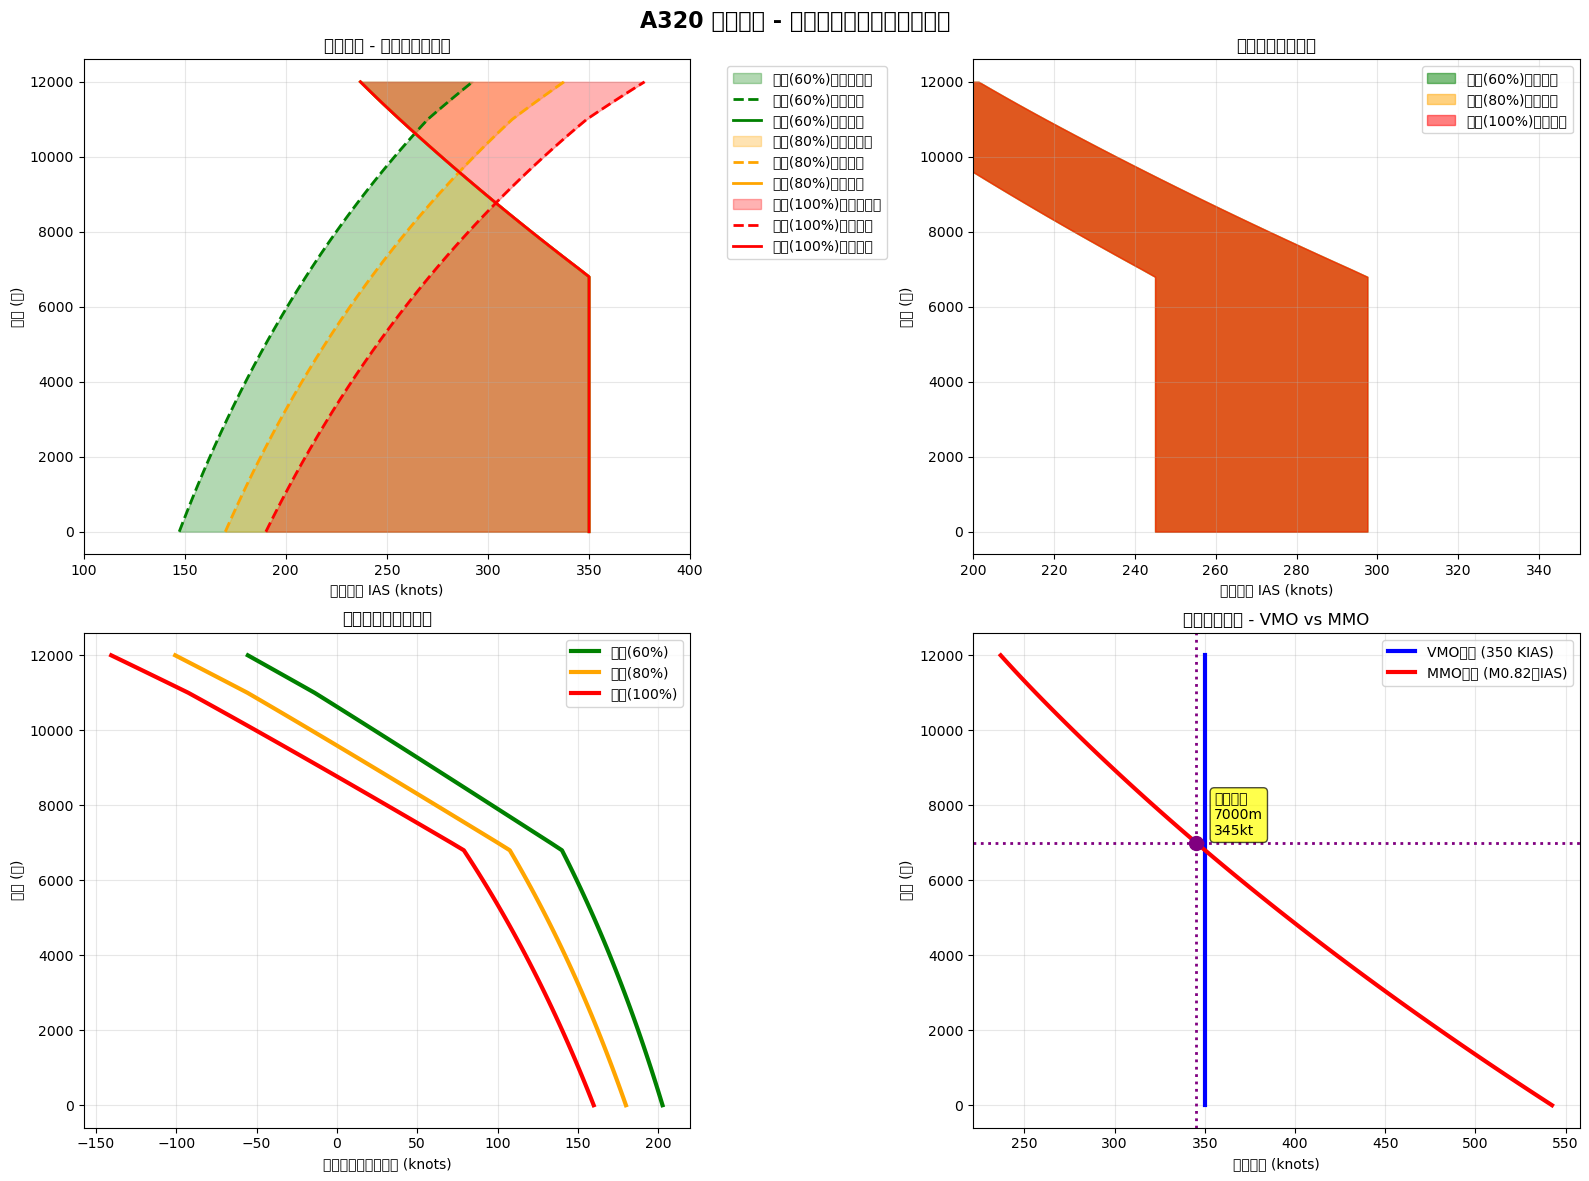


=== 实际飞行意义 ===
1. 低空: 速度范围较窄，主要受VMO限制
2. 中空: 速度范围最宽，操作灵活性最大
3. 高空: 速度范围变窄，主要受马赫数限制
4. 重量影响: 载重越大，最小速度越高，可用范围越小
5. 交叉高度: VMO和MMO限制的转换点，通常在6000-8000米


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# A320典型参数（基于实际数据）
MTOW = 78000  # kg 最大起飞重量
wing_area = 122.6  # m² 机翼面积
CLmax_clean = 1.8  # 干净构型最大升力系数
CLmax_landing = 2.4  # 着陆构型最大升力系数
MMO = 0.82  # 最大操作马赫数
VMO = 350  # 最大操作速度 KIAS

# 高度范围 (0-12000米)
altitudes_m = np.linspace(0, 12000, 61)
altitudes_ft = altitudes_m * 3.28084

def isa_atmosphere(altitude_m):
    """标准大气模型"""
    if altitude_m <= 11000:
        T = 288.15 - 0.0065 * altitude_m
        P = 101325 * (T / 288.15) ** 5.2561
    else:
        T = 216.65
        P = 22632 * np.exp(-0.0001577 * (altitude_m - 11000))
    
    rho = P / (287.05 * T)
    return T, P, rho

def calculate_speed_limits(altitude_m, weight_ratio=1.0):
    """计算给定高度和重量下的速度限制"""
    T, P, rho = isa_atmosphere(altitude_m)
    weight = MTOW * weight_ratio
    
    # 1. 失速速度 (Vs) - 最小速度
    # Vs = sqrt(2*W/(rho*S*CLmax))
    vs_clean = np.sqrt(2 * weight * 9.81 / (rho * wing_area * CLmax_clean)) * 1.94384  # 转为knots
    vs_landing = np.sqrt(2 * weight * 9.81 / (rho * wing_area * CLmax_landing)) * 1.94384
    
    # 安全裕度：Vs1g = 1.3 * Vs (干净构型安全速度)
    vs1g = vs_clean * 1.3
    
    # 2. 马赫数限制转换为IAS
    a_mps = np.sqrt(1.4 * 287.05 * T)  # 音速 m/s
    mmo_tas = MMO * a_mps * 1.94384  # MMO对应的TAS (knots)
    # TAS转IAS: IAS = TAS * sqrt(rho/rho_sl)
    mmo_ias = mmo_tas * np.sqrt(rho / 1.225)
    
    # 3. 结构限制 VMO
    vmo_limit = VMO
    
    # 4. 最大操作速度 = min(VMO, MMO转换的IAS)
    max_speed = min(vmo_limit, mmo_ias)
    
    # 5. 经济巡航速度范围（通常在最大速度的70-85%）
    econ_min = max_speed * 0.70
    econ_max = max_speed * 0.85
    
    return {
        'vs_clean': vs_clean,
        'vs_landing': vs_landing, 
        'vs1g': vs1g,
        'max_speed': max_speed,
        'mmo_ias': mmo_ias,
        'vmo_limit': vmo_limit,
        'econ_min': econ_min,
        'econ_max': econ_max
    }

# 计算不同重量下的速度包线
weight_ratios = [0.6, 0.8, 1.0]  # 60%, 80%, 100% MTOW
weight_labels = ['轻载(60%)', '中载(80%)', '满载(100%)']
colors = ['green', 'orange', 'red']

# 创建图表
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('A320 飞行包线 - 每个高度的可操作速度范围', fontsize=16, fontweight='bold')

# 存储数据用于分析
envelope_data = {}

for i, (weight_ratio, label, color) in enumerate(zip(weight_ratios, weight_labels, colors)):
    speeds_data = []
    
    for alt_m in altitudes_m:
        speeds = calculate_speed_limits(alt_m, weight_ratio)
        speeds_data.append(speeds)
    
    envelope_data[label] = speeds_data
    
    # 提取速度数组
    vs1g = [s['vs1g'] for s in speeds_data]
    max_speeds = [s['max_speed'] for s in speeds_data]
    econ_min = [s['econ_min'] for s in speeds_data]
    econ_max = [s['econ_max'] for s in speeds_data]
    
    # 图1: 完整飞行包线
    ax1.fill_betweenx(altitudes_m, vs1g, max_speeds, alpha=0.3, color=color, label=f'{label}可操作范围')
    ax1.plot(vs1g, altitudes_m, '--', color=color, linewidth=2, label=f'{label}最小速度')
    ax1.plot(max_speeds, altitudes_m, '-', color=color, linewidth=2, label=f'{label}最大速度')

ax1.set_xlabel('指示空速 IAS (knots)')
ax1.set_ylabel('高度 (米)')
ax1.set_title('飞行包线 - 可操作速度范围')
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_xlim(100, 400)

# 图2: 经济巡航范围
for i, (weight_ratio, label, color) in enumerate(zip(weight_ratios, weight_labels, colors)):
    speeds_data = envelope_data[label]
    econ_min = [s['econ_min'] for s in speeds_data]
    econ_max = [s['econ_max'] for s in speeds_data]
    
    ax2.fill_betweenx(altitudes_m, econ_min, econ_max, alpha=0.5, color=color, label=f'{label}经济范围')

ax2.set_xlabel('指示空速 IAS (knots)')
ax2.set_ylabel('高度 (米)')
ax2.set_title('经济巡航速度范围')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xlim(200, 350)

# 图3: 速度范围宽度随高度变化
for i, (weight_ratio, label, color) in enumerate(zip(weight_ratios, weight_labels, colors)):
    speeds_data = envelope_data[label]
    vs1g = [s['vs1g'] for s in speeds_data]
    max_speeds = [s['max_speed'] for s in speeds_data]
    speed_range = [max_s - min_s for max_s, min_s in zip(max_speeds, vs1g)]
    
    ax3.plot(speed_range, altitudes_m, color=color, linewidth=3, label=label)

ax3.set_xlabel('可操作速度范围宽度 (knots)')
ax3.set_ylabel('高度 (米)')
ax3.set_title('速度范围随高度变化')
ax3.grid(True, alpha=0.3)
ax3.legend()

# 图4: 限制因子分析
# 显示在什么高度马赫数限制开始起作用
speeds_data = envelope_data['满载(100%)']
vmo_limits = [s['vmo_limit'] for s in speeds_data]
mmo_ias_limits = [s['mmo_ias'] for s in speeds_data]

ax4.plot(vmo_limits, altitudes_m, 'b-', linewidth=3, label='VMO限制 (350 KIAS)')
ax4.plot(mmo_ias_limits, altitudes_m, 'r-', linewidth=3, label='MMO限制 (M0.82转IAS)')

# 找到交叉点
crossover_alt = None
for i, (vmo, mmo) in enumerate(zip(vmo_limits, mmo_ias_limits)):
    if mmo < vmo:
        crossover_alt = altitudes_m[i]
        crossover_speed = mmo
        break

if crossover_alt:
    ax4.axhline(y=crossover_alt, color='purple', linestyle=':', linewidth=2)
    ax4.axvline(x=crossover_speed, color='purple', linestyle=':', linewidth=2)
    ax4.plot(crossover_speed, crossover_alt, 'purple', marker='o', markersize=10)
    ax4.text(crossover_speed+10, crossover_alt+200, 
             f'交叉高度\n{crossover_alt:.0f}m\n{crossover_speed:.0f}kt', 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

ax4.set_xlabel('速度限制 (knots)')
ax4.set_ylabel('高度 (米)')
ax4.set_title('速度限制因子 - VMO vs MMO')
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()

# 关键高度的数据表
print("=== A320 关键高度的速度范围 ===")
print("高度(m)\t高度(ft)\t最小速度\t最大速度\t范围宽度\t主要限制")
print("-" * 80)

key_altitudes = [0, 1000, 3000, 6000, 9000, 12000]
for alt_m in key_altitudes:
    if alt_m <= max(altitudes_m):
        idx = int(alt_m / 200)  # 每200m一个点
        speeds = envelope_data['满载(100%)'][idx]
        alt_ft = alt_m * 3.28084
        
        # 判断主要限制因子
        if speeds['mmo_ias'] < speeds['vmo_limit']:
            limit_factor = "马赫数"
        else:
            limit_factor = "VMO"
        
        print(f"{alt_m}\t{alt_ft:.0f}\t\t{speeds['vs1g']:.0f}\t\t{speeds['max_speed']:.0f}\t\t{speeds['max_speed']-speeds['vs1g']:.0f}\t\t{limit_factor}")

plt.show()

# 实际意义说明
print("\n=== 实际飞行意义 ===")
print("1. 低空: 速度范围较窄，主要受VMO限制")
print("2. 中空: 速度范围最宽，操作灵活性最大") 
print("3. 高空: 速度范围变窄，主要受马赫数限制")
print("4. 重量影响: 载重越大，最小速度越高，可用范围越小")
print("5. 交叉高度: VMO和MMO限制的转换点，通常在6000-8000米")

/tmp/ipykernel_308003/3769327364.py:246: UserWarning: Glyph 36895 (\N{CJK UNIFIED IDEOGRAPH-901F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308003/3769327364.py:246: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308003/3769327364.py:246: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308003/3769327364.py:246: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308003/3769327364.py:246: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308003/3769327364.py:246: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308003/3769327364.py:246: UserWarning: Glyph 37325 (\N{CJK UN

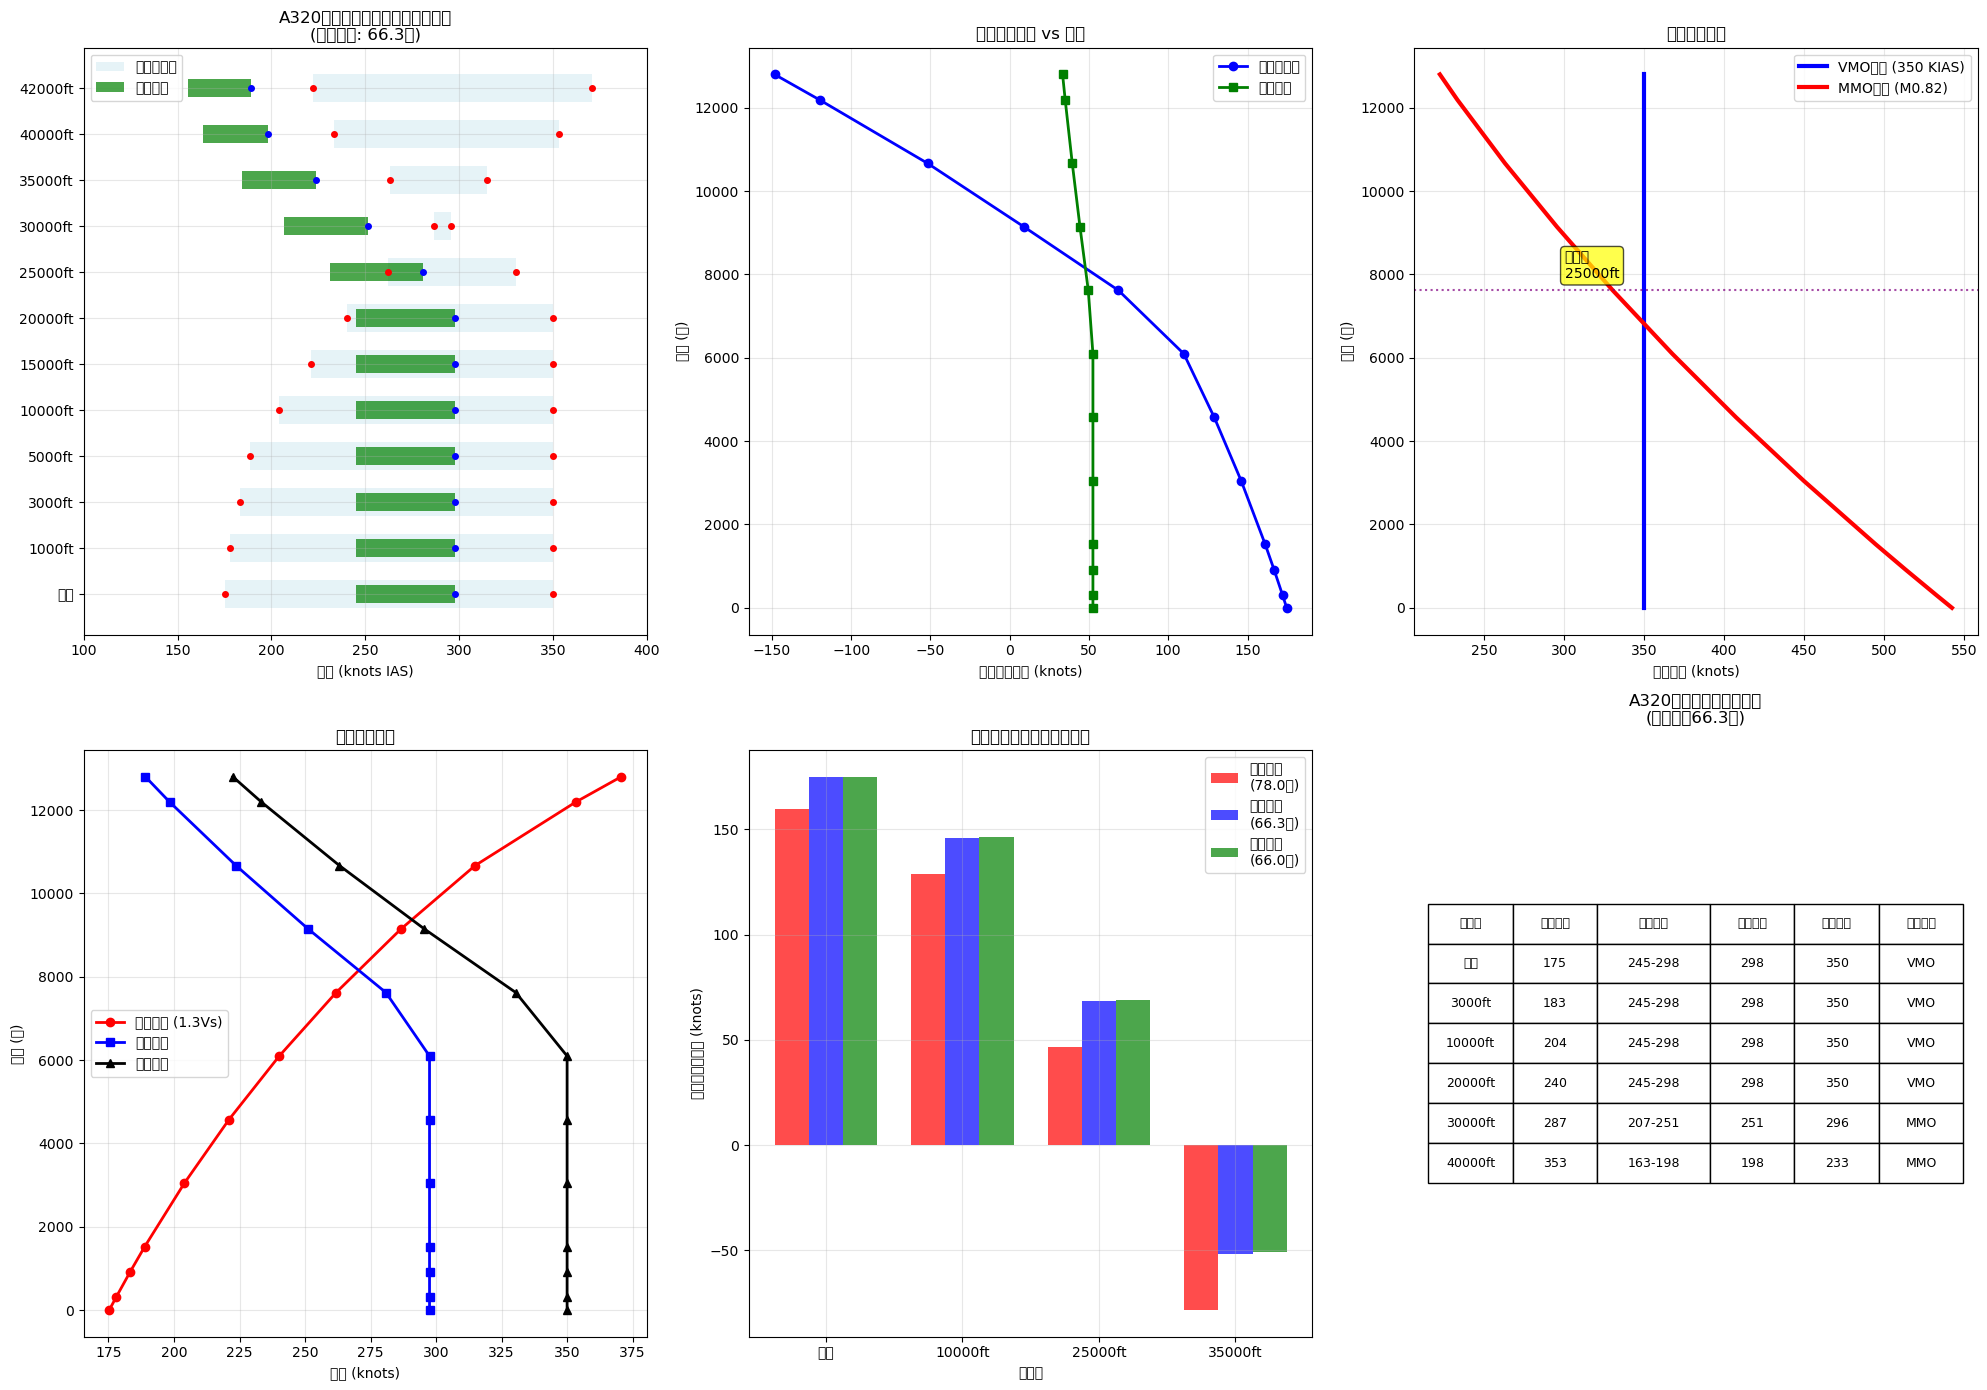

A320标准重量下典型高度层速度范围详细数据
标准重量: 巡航重量 66.3吨 (MTOW的85%)
高度层          高度(m)    最小速度     经济范围         巡航速度     最大速度     范围宽度     限制因子    
----------------------------------------------------------------------------------------------------
地面           0        175      245-298      298      350      175      VMO     
1000ft       305      178      245-298      298      350      172      VMO     
3000ft       914      183      245-298      298      350      167      VMO     
5000ft       1524     189      245-298      298      350      161      VMO     
10000ft      3048     204      245-298      298      350      146      VMO     
15000ft      4572     221      245-298      298      350      129      VMO     
20000ft      6096     240      245-298      298      350      110      VMO     
25000ft      7620     262      231-281      281      330      69       MMO     
30000ft      9144     287      207-251      251      296      9        MMO     
35000ft      10668    315      184-224      224 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# A320标准参数
MTOW = 78000  # kg
MLW = 66000   # kg 最大着陆重量
OEW = 42400   # kg 空重
wing_area = 122.6  # m²
CLmax_clean = 1.8
CLmax_flaps = 2.4
MMO = 0.82
VMO = 350  # KIAS

# 标准重量定义（按飞行阶段）
standard_weights = {
    '起飞重量': MTOW,           # 78000 kg
    '巡航重量': MTOW * 0.85,    # 66300 kg (起飞后消耗15%燃油)
    '着陆重量': MLW,            # 66000 kg
}

# 典型高度层（按国际民航标准）
typical_altitudes = {
    '地面': 0,
    '1000ft': 305,
    '3000ft': 914, 
    '5000ft': 1524,
    '10000ft': 3048,
    '15000ft': 4572,
    '20000ft': 6096,
    '25000ft': 7620,
    '30000ft': 9144,
    '35000ft': 10668,
    '40000ft': 12192,
    '42000ft': 12802  # 服务升限
}

def isa_atmosphere(altitude_m):
    """标准大气模型"""
    if altitude_m <= 11000:
        T = 288.15 - 0.0065 * altitude_m
        P = 101325 * (T / 288.15) ** 5.2561
    else:
        T = 216.65
        P = 22632 * np.exp(-0.0001577 * (altitude_m - 11000))
    
    rho = P / (287.05 * T)
    return T, P, rho

def calculate_speeds(altitude_m, weight):
    """计算特定高度和重量下的速度"""
    T, P, rho = isa_atmosphere(altitude_m)
    
    # 1. 失速速度
    vs_clean = np.sqrt(2 * weight * 9.81 / (rho * wing_area * CLmax_clean)) * 1.94384
    vs_flaps = np.sqrt(2 * weight * 9.81 / (rho * wing_area * CLmax_flaps)) * 1.94384
    
    # 2. 安全速度 (1.3 * Vs)
    v_safe = vs_clean * 1.3
    
    # 3. 马赫数限制
    a_mps = np.sqrt(1.4 * 287.05 * T)
    mmo_tas = MMO * a_mps * 1.94384
    mmo_ias = mmo_tas * np.sqrt(rho / 1.225)
    
    # 4. 最大操作速度
    v_max = min(VMO, mmo_ias)
    
    # 5. 经济速度范围
    v_econ_min = v_max * 0.70
    v_econ_max = v_max * 0.85
    
    # 6. 常用操作速度
    v_climb = min(280, v_max * 0.80)  # 爬升速度
    v_cruise = min(320, v_max * 0.85) # 巡航速度
    v_descent = min(300, v_max * 0.80) # 下降速度
    
    return {
        'vs_clean': vs_clean,
        'vs_flaps': vs_flaps, 
        'v_safe': v_safe,
        'v_max': v_max,
        'v_econ_min': v_econ_min,
        'v_econ_max': v_econ_max,
        'v_climb': v_climb,
        'v_cruise': v_cruise,
        'v_descent': v_descent,
        'mmo_ias': mmo_ias,
        'limited_by': 'MMO' if mmo_ias < VMO else 'VMO'
    }

# 计算所有高度层的数据
results = {}
altitudes_list = list(typical_altitudes.keys())
altitudes_m = list(typical_altitudes.values())

# 使用巡航重量作为标准重量
standard_weight = standard_weights['巡航重量']

for alt_name, alt_m in typical_altitudes.items():
    results[alt_name] = calculate_speeds(alt_m, standard_weight)

# 创建综合图表
fig = plt.figure(figsize=(20, 14))

# 图1: 速度范围条形图
ax1 = plt.subplot(2, 3, 1)
y_pos = np.arange(len(altitudes_list))

# 为每个高度层绘制速度范围条
for i, alt_name in enumerate(altitudes_list):
    data = results[alt_name]
    
    # 绘制总范围
    total_range = data['v_max'] - data['v_safe']
    ax1.barh(i, total_range, left=data['v_safe'], height=0.6, 
             alpha=0.3, color='lightblue', label='可操作范围' if i == 0 else "")
    
    # 绘制经济范围
    econ_range = data['v_econ_max'] - data['v_econ_min']
    ax1.barh(i, econ_range, left=data['v_econ_min'], height=0.4,
             alpha=0.7, color='green', label='经济范围' if i == 0 else "")
    
    # 标记关键速度点
    ax1.plot(data['v_safe'], i, 'ro', markersize=4)  # 安全速度
    ax1.plot(data['v_cruise'], i, 'bo', markersize=4)  # 巡航速度
    ax1.plot(data['v_max'], i, 'ro', markersize=4)   # 最大速度

ax1.set_yticks(y_pos)
ax1.set_yticklabels(altitudes_list)
ax1.set_xlabel('速度 (knots IAS)')
ax1.set_title('A320标准重量下各高度层速度范围\n(巡航重量: 66.3吨)')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(100, 400)

# 图2: 速度范围宽度变化
ax2 = plt.subplot(2, 3, 2)
range_widths = [results[alt]['v_max'] - results[alt]['v_safe'] for alt in altitudes_list]
econ_widths = [results[alt]['v_econ_max'] - results[alt]['v_econ_min'] for alt in altitudes_list]

ax2.plot(range_widths, altitudes_m, 'b-o', linewidth=2, markersize=6, label='总操作范围')
ax2.plot(econ_widths, altitudes_m, 'g-s', linewidth=2, markersize=6, label='经济范围')
ax2.set_xlabel('速度范围宽度 (knots)')
ax2.set_ylabel('高度 (米)')
ax2.set_title('速度范围宽度 vs 高度')
ax2.grid(True, alpha=0.3)
ax2.legend()

# 图3: 限制因子分析
ax3 = plt.subplot(2, 3, 3)
vmo_line = [VMO] * len(altitudes_m)
mmo_line = [results[alt]['mmo_ias'] for alt in altitudes_list]

ax3.plot(vmo_line, altitudes_m, 'b-', linewidth=3, label='VMO限制 (350 KIAS)')
ax3.plot(mmo_line, altitudes_m, 'r-', linewidth=3, label='MMO限制 (M0.82)')

# 标记交叉点
for i, alt_name in enumerate(altitudes_list):
    if results[alt_name]['limited_by'] == 'MMO':
        crossover_alt = altitudes_m[i]
        crossover_speed = results[alt_name]['mmo_ias']
        ax3.axhline(y=crossover_alt, color='purple', linestyle=':', alpha=0.7)
        ax3.text(crossover_speed-30, crossover_alt+300, f'交叉点\n{alt_name}', 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
        break

ax3.set_xlabel('速度限制 (knots)')
ax3.set_ylabel('高度 (米)')
ax3.set_title('速度限制因子')
ax3.grid(True, alpha=0.3)
ax3.legend()

# 图4: 关键速度vs高度
ax4 = plt.subplot(2, 3, 4)
v_safe_line = [results[alt]['v_safe'] for alt in altitudes_list]
v_cruise_line = [results[alt]['v_cruise'] for alt in altitudes_list]
v_max_line = [results[alt]['v_max'] for alt in altitudes_list]

ax4.plot(v_safe_line, altitudes_m, 'r-o', linewidth=2, label='安全速度 (1.3Vs)')
ax4.plot(v_cruise_line, altitudes_m, 'b-s', linewidth=2, label='巡航速度')
ax4.plot(v_max_line, altitudes_m, 'k-^', linewidth=2, label='最大速度')

ax4.set_xlabel('速度 (knots)')
ax4.set_ylabel('高度 (米)')
ax4.set_title('关键操作速度')
ax4.grid(True, alpha=0.3)
ax4.legend()

# 图5: 不同重量对比（选择几个关键高度）
ax5 = plt.subplot(2, 3, 5)
key_altitudes = ['地面', '10000ft', '25000ft', '35000ft']
weight_names = list(standard_weights.keys())
colors = ['red', 'blue', 'green']

x_pos = np.arange(len(key_altitudes))
width = 0.25

for i, (weight_name, weight) in enumerate(standard_weights.items()):
    ranges = []
    for alt_name in key_altitudes:
        alt_m = typical_altitudes[alt_name]
        data = calculate_speeds(alt_m, weight)
        ranges.append(data['v_max'] - data['v_safe'])
    
    ax5.bar(x_pos + i*width, ranges, width, label=f'{weight_name}\n({weight/1000:.1f}吨)',
            color=colors[i], alpha=0.7)

ax5.set_xlabel('高度层')
ax5.set_ylabel('可操作速度范围 (knots)')
ax5.set_title('不同重量下的速度范围对比')
ax5.set_xticks(x_pos + width)
ax5.set_xticklabels(key_altitudes)
ax5.legend()
ax5.grid(True, alpha=0.3)

# 图6: 详细数据表格可视化
ax6 = plt.subplot(2, 3, 6)
ax6.axis('tight')
ax6.axis('off')

# 创建表格数据
table_data = []
for alt_name in altitudes_list[::2]:  # 每隔一个高度显示
    data = results[alt_name]
    table_data.append([
        alt_name,
        f"{data['v_safe']:.0f}",
        f"{data['v_econ_min']:.0f}-{data['v_econ_max']:.0f}",
        f"{data['v_cruise']:.0f}",
        f"{data['v_max']:.0f}",
        data['limited_by']
    ])

table = ax6.table(cellText=table_data,
                 colLabels=['高度层', '最小速度', '经济范围', '巡航速度', '最大速度', '限制因子'],
                 cellLoc='center',
                 loc='center',
                 colWidths=[0.15, 0.15, 0.2, 0.15, 0.15, 0.15])

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)
ax6.set_title('A320标准重量速度数据表\n(巡航重量66.3吨)', pad=20)

plt.tight_layout()
plt.show()

# 打印详细数据表
print("=" * 100)
print("A320标准重量下典型高度层速度范围详细数据")
print("标准重量: 巡航重量 66.3吨 (MTOW的85%)")
print("=" * 100)
print(f"{'高度层':<12} {'高度(m)':<8} {'最小速度':<8} {'经济范围':<12} {'巡航速度':<8} {'最大速度':<8} {'范围宽度':<8} {'限制因子':<8}")
print("-" * 100)

for alt_name in altitudes_list:
    data = results[alt_name]
    alt_m = typical_altitudes[alt_name]
    range_width = data['v_max'] - data['v_safe']
    econ_range = f"{data['v_econ_min']:.0f}-{data['v_econ_max']:.0f}"
    
    print(f"{alt_name:<12} {alt_m:<8.0f} {data['v_safe']:<8.0f} {econ_range:<12} {data['v_cruise']:<8.0f} {data['v_max']:<8.0f} {range_width:<8.0f} {data['limited_by']:<8}")

print("\n" + "=" * 100)
print("关键发现:")
print("1. 最大速度范围: 25000ft-30000ft (约200+ knots)")
print("2. VMO/MMO交叉点: 约15000-20000ft")
print("3. 高空(35000ft+)主要受马赫数限制")
print("4. 经济巡航范围通常在最大速度的70-85%")
print("=" * 100)

In [32]:
import cdsapi

c = cdsapi.Client()
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': ['10m_u_component_of_wind', '10m_v_component_of_wind'],
        'year': '2024',
        'month': '06',
        'day': '01',
        'time': '12:00',
        'format': 'netcdf',
    },
    'wind_data.nc')


Exception: Missing/incomplete configuration file: /home/longqin/.cdsapirc